# آستانه مطلوب (Optimal Thresholding)

روش قبلی (تحلیل دونمایی هیستوگرام) تا زمانی که دو قله جدا از یکدیگر باشند و نویز بیش از اندازه نباشد، به درستی کار می‌کند. به محض اینکه دو قله به هم نزدیک می‌شوند و در هم فرو می‌روند، دیگر استفاده از آنتی مد جواب بهینه را به ما نمی‌دهد.

فرض کنیم ۲ قله هر کدام یک توزیع نرمال (Normal Distributions) باشد. در این صورت آستانه بهینه جایی است که این دو توزیع با هم برخورد می‌کنند.
در این حالت نقطه آنتی مد دورتر درسمت راست محل تلاقی ۲ توزیع نرمال قرار می‌گیرد

الگوریتم زیر نحوه بدست آوردن آستانه مطلوب را نشان می‌دهد:
1. یک مقدار اولیه برای آستانه انتخاب می‌کنیم
$$
t=0
$$
$$
T^{t}=<initial>
$$
2. در یک حلقه تکراری میانگین پیکسل‌های کوچک‌تر از آستانه و میانگین پیکسل‌های بزرگ‌تر از آستانه را محاسبه می‌کنیم.
$$
w_{b}(T^{t})=\Sigma^{T^{t}-1}_{g=0}p(g)
$$

$$
\mu_{b}(T^{t})=\frac{\Sigma^{T^{t}-1}_{g=0}p(g).g}{w_{b}(T^{t})}
$$

$$
w_{f}(T^{t})=1-w_{b}(T^{t})
$$

$$
\mu_{f}(T^{t})=\frac{\Sigma^{255}_{T^{t}}p(g).g}{w_{f}(T^{t})}
$$
3. مقدار آستانه را بروزرسانی می‌کنیم:
$$
T^{t+1}=\frac{\mu_{b}(T^{t}) + \mu_{f}(T^{t})}{2}
$$
4. در صورتی که مقدار آستانه جدید با آستانه قبلی برابر بود، برنامه  متوقف می‌شود، در غیر این صورت حلقه با آستانه جدید تکرار می‌شود

برای مثال می‌خواهیم آستانه تصویر زیر را از روش آستانه مطلوب بدست آوریم

In [1]:
# import necessary libraries
from math import floor
import cv2
import numpy as np
import matplotlib.pyplot as plt

# to show image in notebook
%matplotlib inline

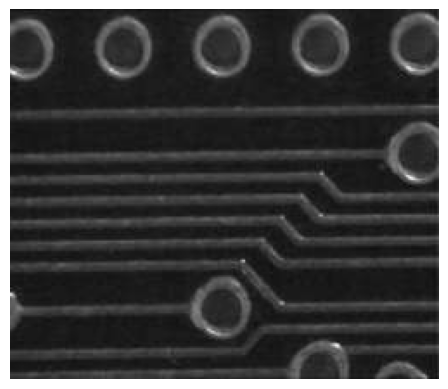

In [2]:
img = cv2.imread('/content/optimal_thresholding_of_a_grey_scale_image.jpg')

plt.axis('off')
plt.imshow(img, cmap='gray')

هیستوگرام تصویر را بدست می‌‌آوریم

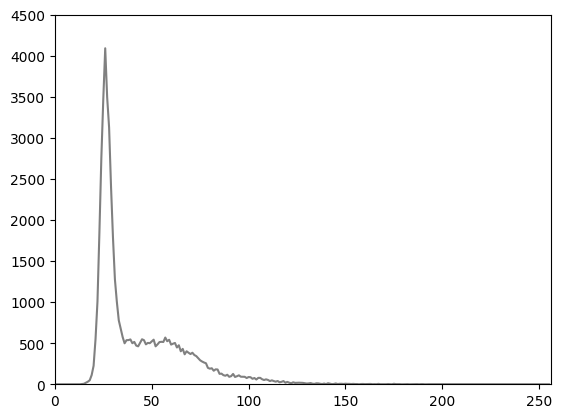

In [3]:
histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.plot(histogram, color='gray')
plt.xlim([0, 256])
plt.ylim([0, 4500])
plt.show()

یک تابع تعریف می‌کنیم که الگوریتم به دست آوردن آستانه مطلوب در آن پیاده‌سازی شود

In [4]:
def optimal_threshold(histogram)-> int:
  T = np.random.randint(0, 255)

  while(True):
    w_b = 0
    for i in range(T):
      w_b += histogram[i][0] / histogram.sum()

    w_f = 1 - w_b

    temp_b = 0
    for i in range(T):
      temp_b += (histogram[i][0] / histogram.sum()) * i

    mean_b = temp_b / w_b

    temp_f = 0
    for i in range(T, 256):
      temp_f += (histogram[i][0] / histogram.sum()) * i

    mean_f = temp_f / w_f

    new_T = floor((mean_b + mean_f) / 2)

    if new_T == T:
      return new_T

    T = new_T

با اجرای تابع آستانه را بدست می‌آوریم

In [5]:
T = optimal_threshold(histogram)

print('Optimal Threshold is: {}'.format(T))

Optimal Threshold is: 51


با استفاده از آستانه بدست آمده تصویر باینری را بدست می‌آوریم

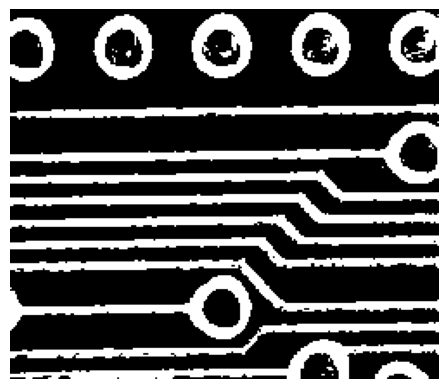

In [6]:
_, img_binary = cv2.threshold(img, T, 255, cv2.THRESH_BINARY)

plt.axis('off')
plt.imshow(img_binary, cmap='gray')